In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.dslabs_functions import plot_bar_chart, get_variable_types
import seaborn as sns
import numpy as np

In [2]:
fig_path = "../figures/data_profiling/"

### Health domain – Pos covid

In [3]:
df = pd.read_csv('../datasets/class_pos_covid.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


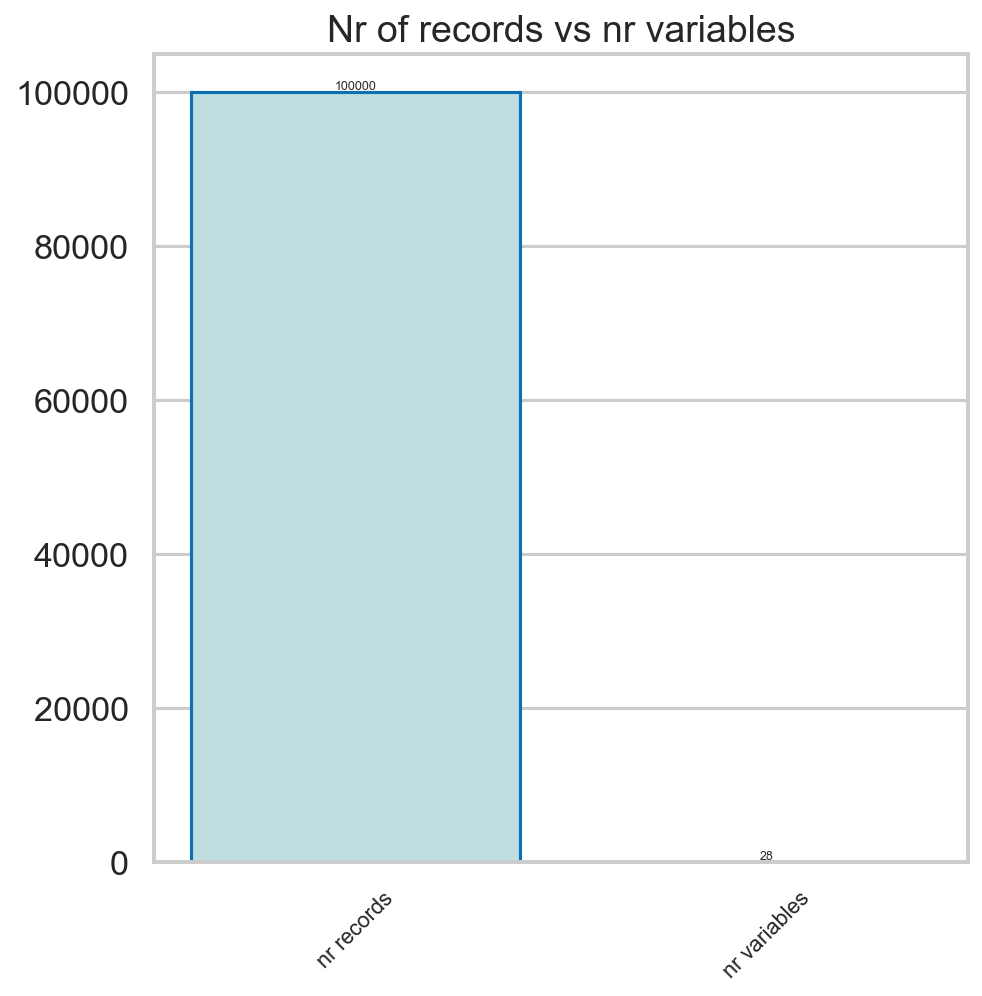

In [18]:
plt.figure(figsize=(7, 7))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
plt.savefig(fig_path+ "records_variables_pos_cov.png")
plt.show()

object     13
float64    10
int64       5
Name: count, dtype: int64


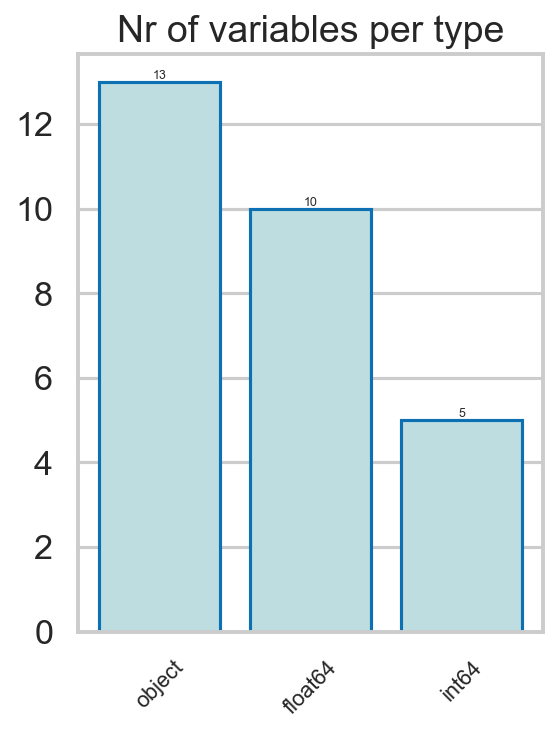

In [22]:
# Nr variables per type
variable_types = df.dtypes.value_counts()
print(variable_types)
values = np.array([int(i) for i in variable_types.values])
index = np.array([str(string) for string in variable_types.index])

plt.figure(figsize=(4, 5))
plot_bar_chart(
    list(index), list(values), title="Nr of variables per type"
)
plt.savefig(fig_path+"variable_types_cov_pos.png")

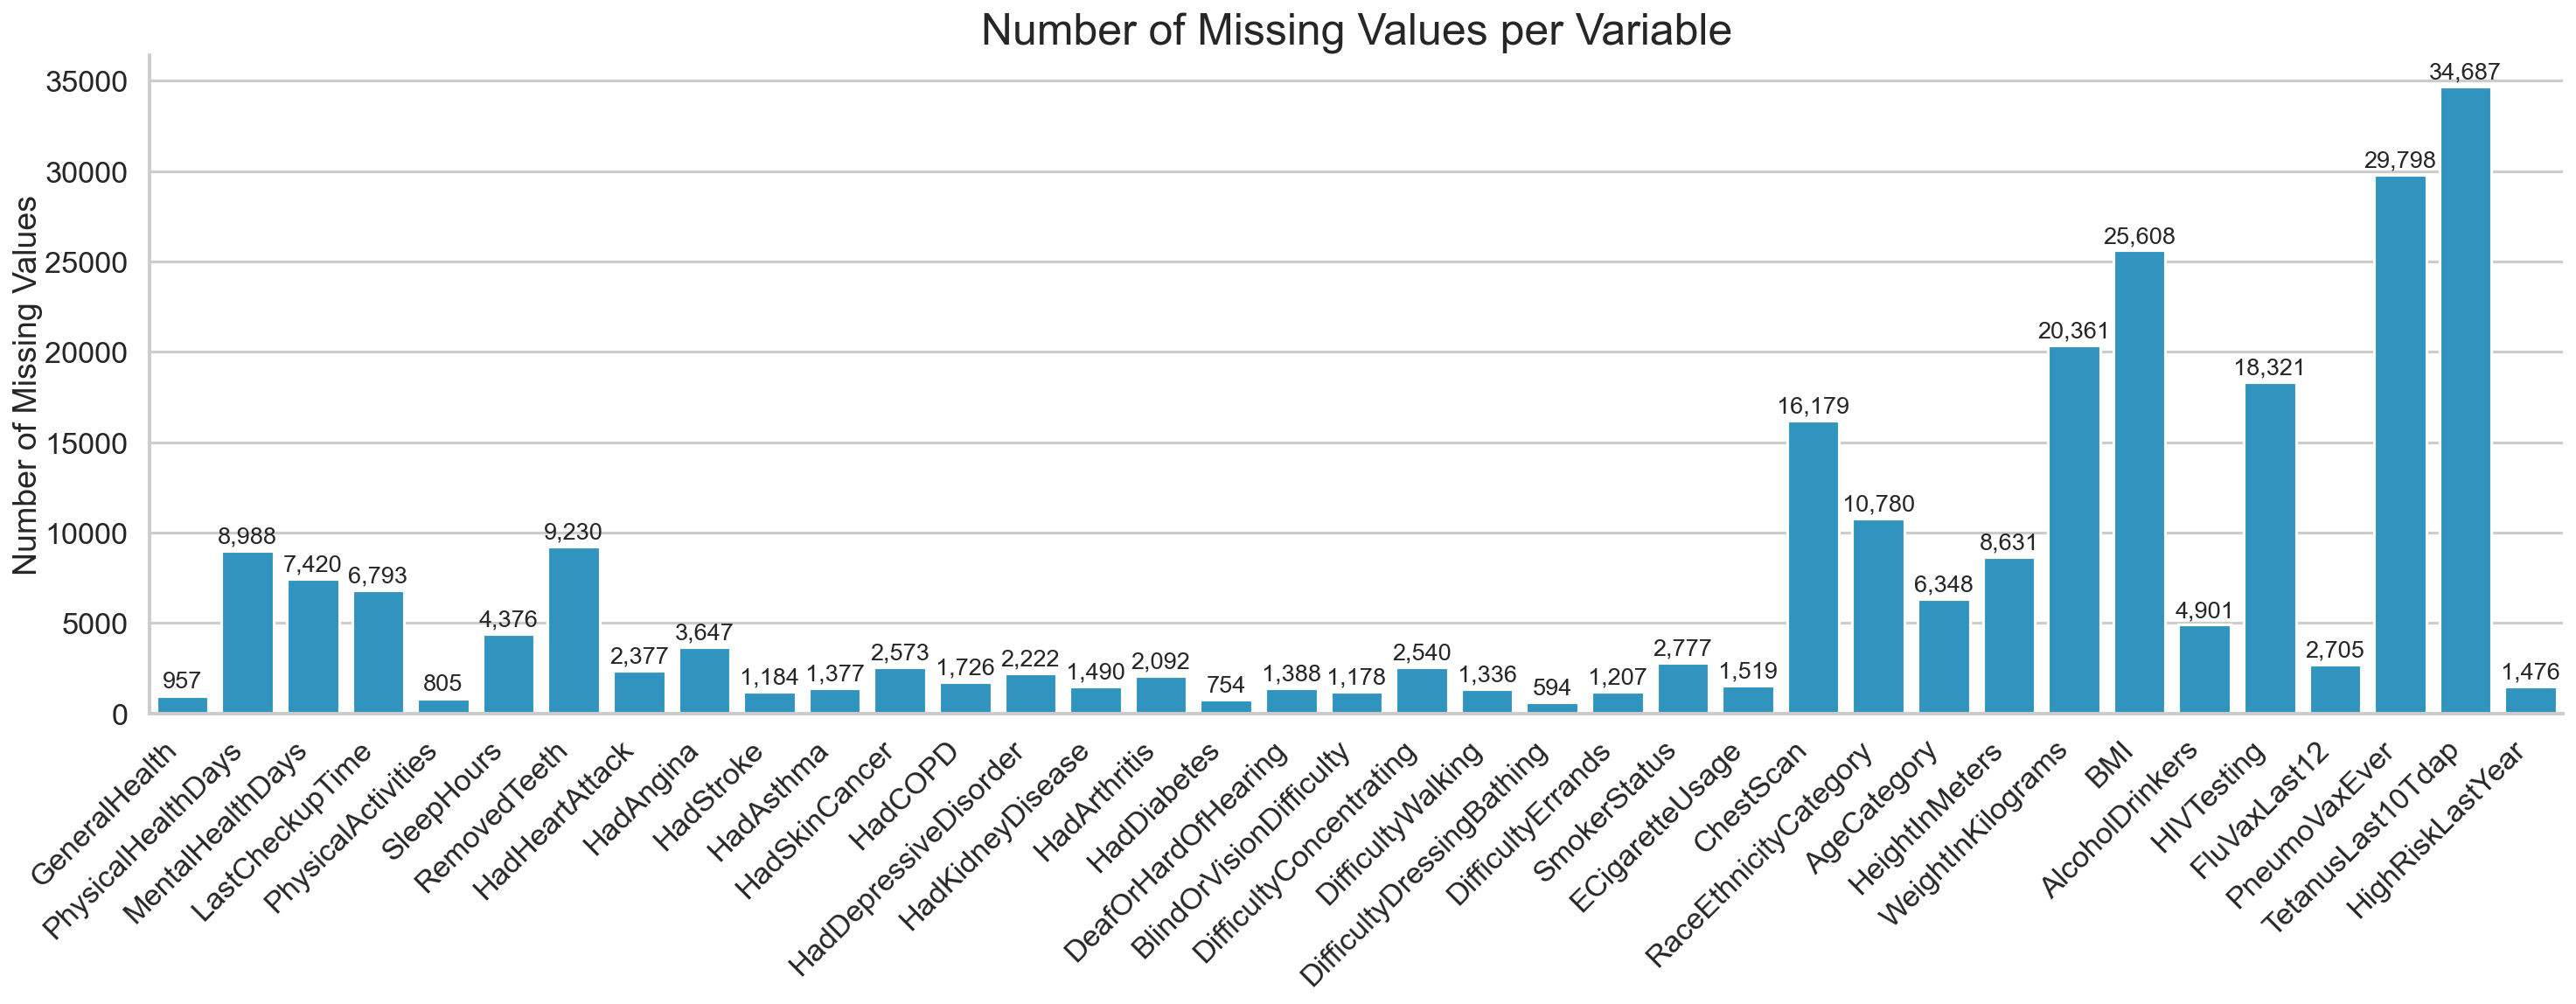

In [6]:
# Find missing values
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr


# Creating mock data for the demonstration.
# Assuming there are 20 variables.
variables = list(mv.keys())
# Generating random data to represent missing values.
missing_values = list(mv.values())

# Set the aesthetic style of the plots.
sns.set_style("whitegrid")

# Set context to "talk" for larger text, suitable for presentations.
sns.set_context("talk")

# Create a color palette.
palette = sns.color_palette("coolwarm", len(variables))

# Create a larger figure size for a wider plot.
plt.figure(figsize=(20, 8))

# Create the bar plot.
bars = sns.barplot(x=variables, y=missing_values)

# Rotate the x labels for better readability.
plt.xticks(rotation=45, ha='right')

# Add a title and labels with a larger font size.
plt.title('Number of Missing Values per Variable', fontsize=24)
# plt.xlabel('Variables', fontsize=18)
plt.ylabel('Number of Missing Values', fontsize=18)

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',.0f'),  # No decimal places, include commas as thousands separators.
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center',
                  size=13, xytext=(0, 8),
                  textcoords='offset points')

# Remove the top and right spines for a cleaner look.
sns.despine()

# Show the plot with a tight layout.
plt.tight_layout()
plt.savefig
plt.savefig(fig_path+"missing_values_pos_cov.png")


### Services domain - Credit score

In [7]:
df = pd.read_csv('../datasets/class_credit_score.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,Credit_History_Age,Payment_of_Min_Amount,TotalEMIpermonth,Amountinvestedmonthly,Payment_Behaviour,MonthlyBalance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


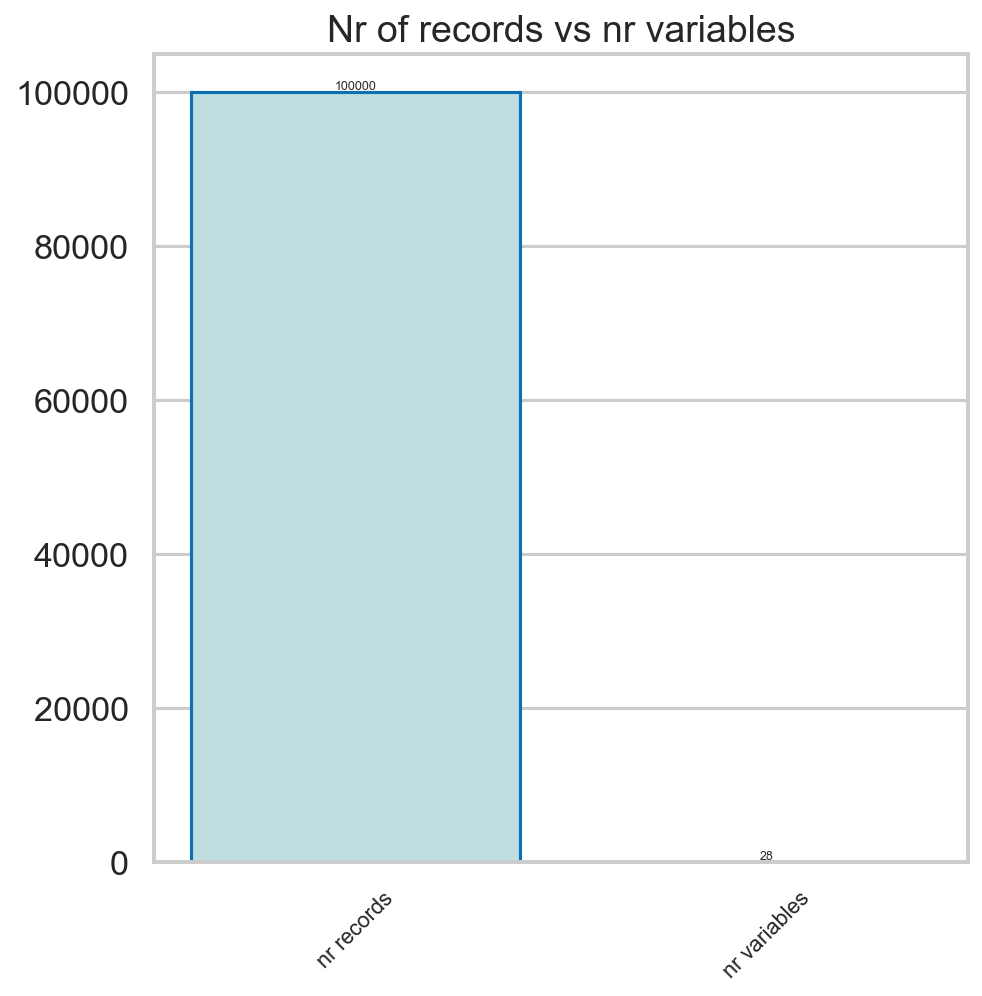

In [23]:
plt.figure(figsize=(7, 7))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
plt.savefig(fig_path+ "records_variables_credit.png")
plt.show()

object     13
float64    10
int64       5
Name: count, dtype: int64


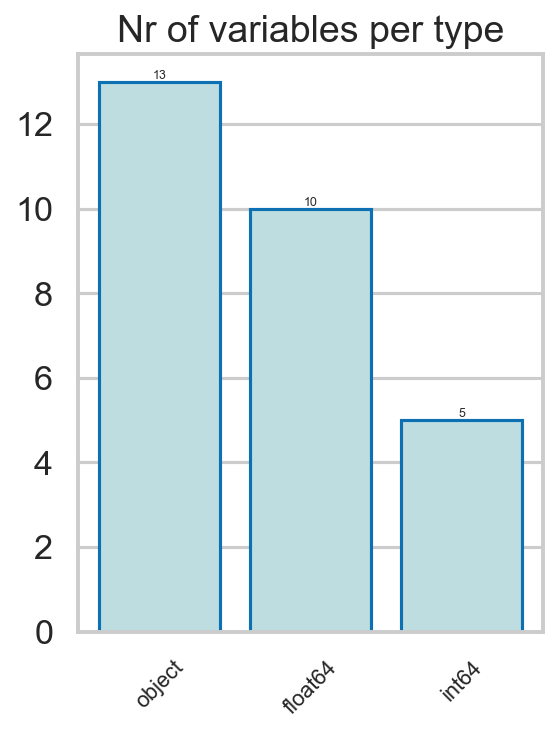

In [25]:
# Nr variables per type
variable_types = df.dtypes.value_counts()
print(variable_types)
values = np.array([int(i) for i in variable_types.values])
index = np.array([str(string) for string in variable_types.index])

plt.figure(figsize=(4, 5))
plot_bar_chart(
    list(index), list(values), title="Nr of variables per type"
)
plt.savefig(fig_path+"variable_types_credit.png")

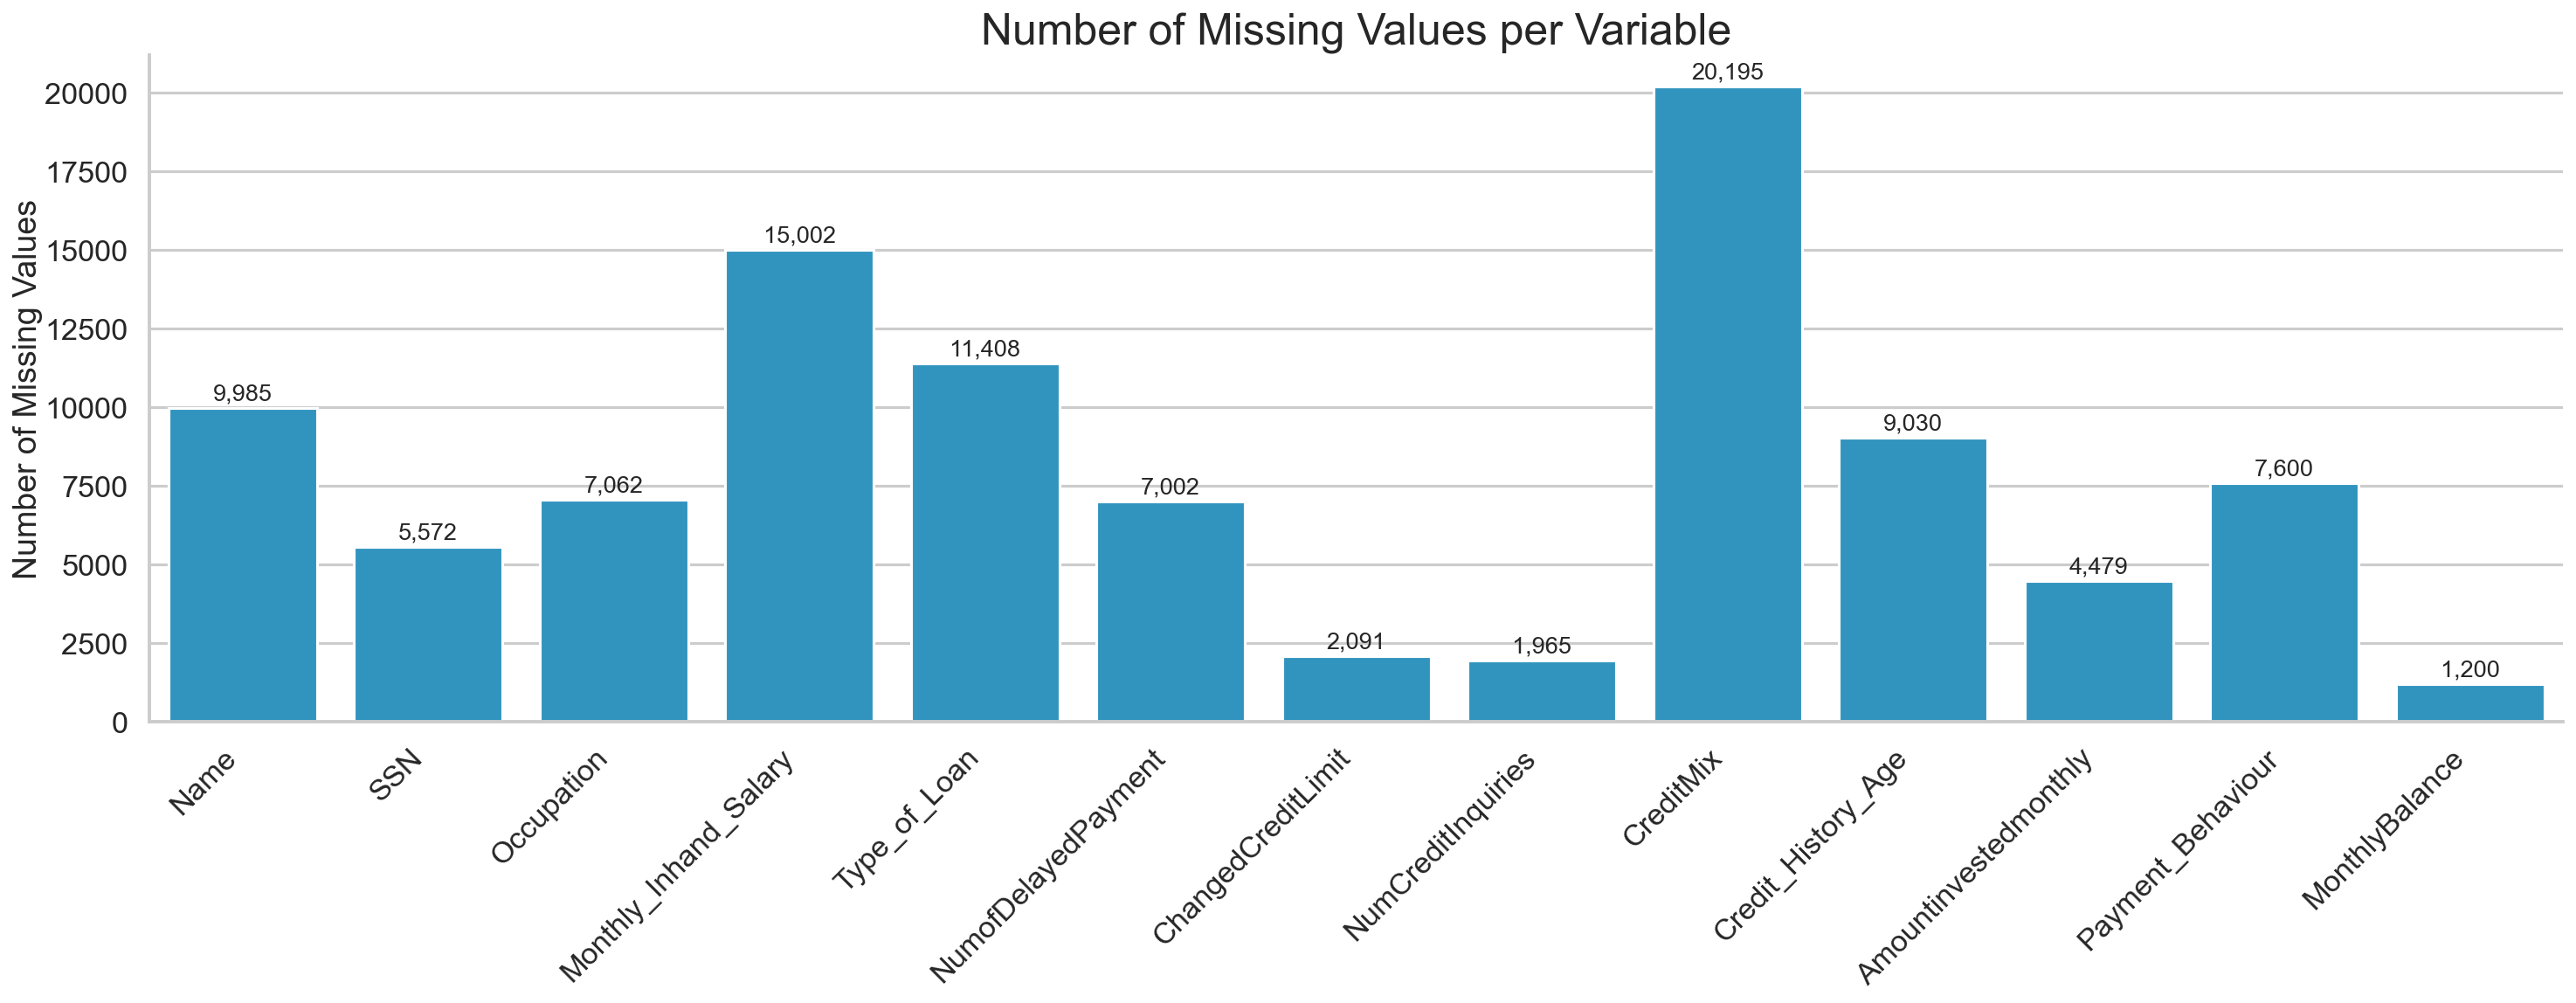

In [10]:
# Find missing values
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr


# Creating mock data for the demonstration.
# Assuming there are 20 variables.
variables = list(mv.keys())
# Generating random data to represent missing values.
missing_values = list(mv.values())

# Set the aesthetic style of the plots.
sns.set_style("whitegrid")

# Set context to "talk" for larger text, suitable for presentations.
sns.set_context("talk")

# Create a color palette.
palette = sns.color_palette("coolwarm", len(variables))

# Create a larger figure size for a wider plot.
plt.figure(figsize=(20, 8))

# Create the bar plot.
bars = sns.barplot(x=variables, y=missing_values)

# Rotate the x labels for better readability.
plt.xticks(rotation=45, ha='right')

# Add a title and labels with a larger font size.
plt.title('Number of Missing Values per Variable', fontsize=24)
# plt.xlabel('Variables', fontsize=18)
plt.ylabel('Number of Missing Values', fontsize=18)

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',.0f'),  # No decimal places, include commas as thousands separators.
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center',
                  size=13, xytext=(0, 8),
                  textcoords='offset points')

# Remove the top and right spines for a cleaner look.
sns.despine()

# Show the plot with a tight layout.
plt.tight_layout()
plt.savefig
plt.savefig(fig_path+"missing_values_credit.png")
